In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
import tensorflow as tf
gpus = tf.config.list_physical_devices("GPU")
if gpus:
    for gpu in gpus:
        print("Found a GPU with the name:", gpu)
else:
    print("Failed to detect a GPU.")


Failed to detect a GPU.


In [3]:
df = pd.read_csv("House_Price_India.csv")
df.head()

id   Date  number of bedrooms  number of bathrooms  living area  \
0  6762810145  42491                   5                 2.50         3650   
1  6762810635  42491                   4                 2.50         2920   
2  6762810998  42491                   5                 2.75         2910   
3  6762812605  42491                   4                 2.50         3310   
4  6762812919  42491                   3                 2.00         2710   

   lot area  number of floors  waterfront present  number of views  \
0      9050               2.0                   0                4   
1      4000               1.5                   0                0   
2      9480               1.5                   0                0   
3     42998               2.0                   0                0   
4      4500               1.5                   0                0   

   condition of the house  ...  Built Year  Renovation Year  Postal Code  \
0                       5  ...        1921                0       122003   
1                       5  ...        1909                0       122004   
2                       3  ...        1939                0       122004   
3                       3  ...        2001                0       122005   
4                       4  ...        1929                0       122006   

   Lattitude  Longitude  living_area_renov  lot_area_renov  \
0    52.8645   -114.557               2880            5400   
1    52.8878   -114.470               2470            4000   
2    52.8852   -114.468               2940            6600   
3    52.9532   -114.321               3350           42847   
4    52.9047   -114.485               2060            4500   

   Number of schools nearby  Distance from the airport    Price  
0                         2                         58  2380000  
1                         2                         51  1400000  
2                         1                         53  1200000  
3                         3                         76   838000  
4                         1                         51   805000  

[5 rows x 23 columns]

In [4]:
df.shape

(14620, 23)

In [5]:
old = df['Postal Code'].unique()
old

array([122003, 122004, 122005, 122006, 122007, 122008, 122009, 122010,
       122011, 122012, 122013, 122014, 122015, 122016, 122017, 122018,
       122019, 122020, 122021, 122022, 122023, 122024, 122025, 122026,
       122027, 122028, 122029, 122030, 122031, 122032, 122033, 122034,
       122035, 122036, 122037, 122038, 122039, 122040, 122041, 122042,
       122043, 122044, 122045, 122046, 122047, 122048, 122049, 122050,
       122051, 122052, 122053, 122054, 122055, 122056, 122057, 122058,
       122059, 122060, 122061, 122062, 122063, 122064, 122065, 122066,
       122067, 122068, 122069, 122070, 122071, 122072], dtype=int64)

In [6]:
def find_and_replace(df, column_name, to_replace, replacement):
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' does not exist in the DataFrame.")
    
    # Replace the values
    df[column_name] = df[column_name].replace(to_replace, replacement)
    
    return df

In [7]:
data = {
    'newpin': [302001, 302002, 302003, 302004, 302005, 302006, 302021, 
                110001, 110002, 110003, 110004, 110005, 110006, 110007, 
                560001, 560002, 560003, 560004, 560005, 560006, 560007, 
                411001, 411002, 411003, 411004, 411005, 411006, 411007, 
                500001, 500002, 500003, 500004, 500005, 500006, 500007, 
                700001, 700002, 700003, 700004, 700005, 700006, 700007, 
                400001, 400002, 400003, 400004, 400005, 400006, 400007, 
                380001, 380002, 380003, 380004, 380005, 380007, 380008, 
                226001, 226002, 226003, 226004, 226005, 226006, 226007, 
                600001, 600002, 600003, 600004, 600005, 600006, 600007]
}

new_df = pd.DataFrame(data)


In [8]:
df_new= df
df_new

id   Date  number of bedrooms  number of bathrooms  \
0      6762810145  42491                   5                 2.50   
1      6762810635  42491                   4                 2.50   
2      6762810998  42491                   5                 2.75   
3      6762812605  42491                   4                 2.50   
4      6762812919  42491                   3                 2.00   
...           ...    ...                 ...                  ...   
14615  6762830250  42734                   2                 1.50   
14616  6762830339  42734                   3                 2.00   
14617  6762830618  42734                   2                 1.00   
14618  6762830709  42734                   4                 1.00   
14619  6762831463  42734                   3                 1.00   

       living area  lot area  number of floors  waterfront present  \
0             3650      9050               2.0                   0   
1             2920      4000               1.5                   0   
2             2910      9480               1.5                   0   
3             3310     42998               2.0                   0   
4             2710      4500               1.5                   0   
...            ...       ...               ...                 ...   
14615         1556     20000               1.0                   0   
14616         1680      7000               1.5                   0   
14617         1070      6120               1.0                   0   
14618         1030      6621               1.0                   0   
14619          900      4770               1.0                   0   

       number of views  condition of the house  ...  Built Year  \
0                    4                       5  ...        1921   
1                    0                       5  ...        1909   
2                    0                       3  ...        1939   
3                    0                       3  ...        2001   
4                    0                       4  ...        1929   
...                ...                     ...  ...         ...   
14615                0                       4  ...        1957   
14616                0                       4  ...        1968   
14617                0                       3  ...        1962   
14618                0                       4  ...        1955   
14619                0                       3  ...        1969   

       Renovation Year  Postal Code  Lattitude  Longitude  living_area_renov  \
0                    0       122003    52.8645   -114.557               2880   
1                    0       122004    52.8878   -114.470               2470   
2                    0       122004    52.8852   -114.468               2940   
3                    0       122005    52.9532   -114.321               3350   
4                    0       122006    52.9047   -114.485               2060   
...                ...          ...        ...        ...                ...   
14615                0       122066    52.6191   -114.472               2250   
14616                0       122072    52.5075   -114.393               1540   
14617                0       122056    52.7289   -114.507               1130   
14618                0       122042    52.7157   -114.411               1420   
14619             2009       122018    52.5338   -114.552                900   

       lot_area_renov  Number of schools nearby  Distance from the airport  \
0                5400                         2                         58   
1                4000                         2                         51   
2                6600                         1                         53   
3               42847                         3                         76   
4                4500                         1                         51   
...               ...                       ...                        ...   
14615           17286            

In [9]:
for old_pin, new_pin in zip(old, new_df['newpin']):
    df_new = find_and_replace(df_new, 'Postal Code', old_pin, new_pin)

In [10]:
df_new['Postal Code'].unique()
df= df_new
df

id   Date  number of bedrooms  number of bathrooms  \
0      6762810145  42491                   5                 2.50   
1      6762810635  42491                   4                 2.50   
2      6762810998  42491                   5                 2.75   
3      6762812605  42491                   4                 2.50   
4      6762812919  42491                   3                 2.00   
...           ...    ...                 ...                  ...   
14615  6762830250  42734                   2                 1.50   
14616  6762830339  42734                   3                 2.00   
14617  6762830618  42734                   2                 1.00   
14618  6762830709  42734                   4                 1.00   
14619  6762831463  42734                   3                 1.00   

       living area  lot area  number of floors  waterfront present  \
0             3650      9050               2.0                   0   
1             2920      4000               1.5                   0   
2             2910      9480               1.5                   0   
3             3310     42998               2.0                   0   
4             2710      4500               1.5                   0   
...            ...       ...               ...                 ...   
14615         1556     20000               1.0                   0   
14616         1680      7000               1.5                   0   
14617         1070      6120               1.0                   0   
14618         1030      6621               1.0                   0   
14619          900      4770               1.0                   0   

       number of views  condition of the house  ...  Built Year  \
0                    4                       5  ...        1921   
1                    0                       5  ...        1909   
2                    0                       3  ...        1939   
3                    0                       3  ...        2001   
4                    0                       4  ...        1929   
...                ...                     ...  ...         ...   
14615                0                       4  ...        1957   
14616                0                       4  ...        1968   
14617                0                       3  ...        1962   
14618                0                       4  ...        1955   
14619                0                       3  ...        1969   

       Renovation Year  Postal Code  Lattitude  Longitude  living_area_renov  \
0                    0       302001    52.8645   -114.557               2880   
1                    0       302002    52.8878   -114.470               2470   
2                    0       302002    52.8852   -114.468               2940   
3                    0       302003    52.9532   -114.321               3350   
4                    0       302004    52.9047   -114.485               2060   
...                ...          ...        ...        ...                ...   
14615                0       600001    52.6191   -114.472               2250   
14616                0       600007    52.5075   -114.393               1540   
14617                0       380005    52.7289   -114.507               1130   
14618                0       700005    52.7157   -114.411               1420   
14619             2009       560002    52.5338   -114.552                900   

       lot_area_renov  Number of schools nearby  Distance from the airport  \
0                5400                         2                         58   
1                4000                         2                         51   
2                6600                         1                         53   
3               42847                         3                         76   
4                4500                         1                         51   
...               ...                       ...                        ...   
14615           17286            

In [11]:
df.groupby('number of bedrooms')['number of bedrooms'].agg('count')

number of bedrooms
1      136
2     1844
3     6612
4     4724
5     1079
6      176
7       30
8       11
9        3
10       3
11       1
33       1
Name: number of bedrooms, dtype: int64

In [12]:
df.columns

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

In [13]:
df2 = df.drop(['Renovation Year','condition of the house','Built Year','Date','waterfront present','number of views','Area of the basement','Lattitude'	,'Longitude','Area of the house(excluding basement)','Number of schools nearby','living_area_renov','lot_area_renov','grade of the house'],axis='columns')
df2

id  number of bedrooms  number of bathrooms  living area  \
0      6762810145                   5                 2.50         3650   
1      6762810635                   4                 2.50         2920   
2      6762810998                   5                 2.75         2910   
3      6762812605                   4                 2.50         3310   
4      6762812919                   3                 2.00         2710   
...           ...                 ...                  ...          ...   
14615  6762830250                   2                 1.50         1556   
14616  6762830339                   3                 2.00         1680   
14617  6762830618                   2                 1.00         1070   
14618  6762830709                   4                 1.00         1030   
14619  6762831463                   3                 1.00          900   

       lot area  number of floors  Postal Code  Distance from the airport  \
0          9050               2.0       302001                         58   
1          4000               1.5       302002                         51   
2          9480               1.5       302002                         53   
3         42998               2.0       302003                         76   
4          4500               1.5       302004                         51   
...         ...               ...          ...                        ...   
14615     20000               1.0       600001                         76   
14616      7000               1.5       600007                         59   
14617      6120               1.0       380005                         64   
14618      6621               1.0       700005                         54   
14619      4770               1.0       560002                         55   

         Price  
0      2380000  
1      1400000  
2      1200000  
3       838000  
4       805000  
...        ...  
14615   221700  
14616   219200  
14617   209000  
14618   205000  
14619   146000  

[14620 rows x 9 columns]

In [14]:
df2.isnull().sum()

id                           0
number of bedrooms           0
number of bathrooms          0
living area                  0
lot area                     0
number of floors             0
Postal Code                  0
Distance from the airport    0
Price                        0
dtype: int64

In [15]:
df3 = df2.copy()
df3['number of bedrooms'] = df3['number of bedrooms'].apply(int)
df3['number of bathrooms'] = df3['number of bathrooms'].apply(int)
df3['number of floors'] = df3['number of floors'].apply(int)
df3



id  number of bedrooms  number of bathrooms  living area  \
0      6762810145                   5                    2         3650   
1      6762810635                   4                    2         2920   
2      6762810998                   5                    2         2910   
3      6762812605                   4                    2         3310   
4      6762812919                   3                    2         2710   
...           ...                 ...                  ...          ...   
14615  6762830250                   2                    1         1556   
14616  6762830339                   3                    2         1680   
14617  6762830618                   2                    1         1070   
14618  6762830709                   4                    1         1030   
14619  6762831463                   3                    1          900   

       lot area  number of floors  Postal Code  Distance from the airport  \
0          9050                 2       302001                         58   
1          4000                 1       302002                         51   
2          9480                 1       302002                         53   
3         42998                 2       302003                         76   
4          4500                 1       302004                         51   
...         ...               ...          ...                        ...   
14615     20000                 1       600001                         76   
14616      7000                 1       600007                         59   
14617      6120                 1       380005                         64   
14618      6621                 1       700005                         54   
14619      4770                 1       560002                         55   

         Price  
0      2380000  
1      1400000  
2      1200000  
3       838000  
4       805000  
...        ...  
14615   221700  
14616   219200  
14617   209000  
14618   205000  
14619   146000  

[14620 rows x 9 columns]

In [16]:
def cor(x):
    if x == 0:
        return True
    else: 
        return False 
#check if any value is 0 or not

In [17]:
df3[df3['number of bathrooms'].apply(cor)]

id  number of bedrooms  number of bathrooms  living area  \
664    6762829946                   2                    0          650   
1172   6762824406                   2                    0          850   
1283   6762828168                   1                    0         1170   
1334   6762818371                   1                    0          820   
1382   6762831615                   1                    0          430   
2034   6762827250                   1                    0          560   
2397   6762824844                   2                    0         1392   
2595   6762827929                   1                    0          420   
2906   6762831474                   4                    0         1440   
3204   6762829463                   1                    0          380   
3310   6762822746                   2                    0         1020   
3548   6762817287                   2                    0         1440   
3623   6762830983                   1                    0          930   
3786   6762818355                   2                    0          840   
4048   6762828143                   1                    0          370   
4224   6762831590                   2                    0          660   
4565   6762831429                   3                    0          490   
4862   6762830758                   1                    0          590   
4968   6762831558                   2                    0          550   
5879   6762829967                   3                    0         1040   
6587   6762830559                   2                    0          840   
6796   6762813167                   2                    0         1260   
7045   6762825782                   2                    0          520   
7058   6762829026                   1                    0          880   
7400   6762826444                   3                    0         1270   
7735   6762831467                   1                    0          480   
7850   6762830726                   2                    0         1130   
8951   6762817630                   2                    0         1040   
9065   6762825346                   2                    0         1060   
9429   6762827556                   1                    0          740   
9864   6762831254                   3                    0         1040   
10077  6762828312                   2                    0         1180   
10090  6762831540                   1                    0          840   
10390  6762827561                   2                    0          440   
10713  6762826055                   2                    0         1020   
10805  6762826506                   1                    0          770   
11141  6762824806                   2                    0          760   
11166  6762830703                   3                    0          770   
11167  6762830805                   2                    0          780   
11212  6762823502                   3                    0         1330   
11361  6762824150                   1                    0          760   
11365  6762824678                   3                    0         1420   
12437  6762830808                   1                    0          680   
12946  6762831119                   2                    0          900   
13398  6762824691                   1                    0          530   
13856  6762830708                   3                    0         1080   
13912  6762826622                   4                    0         2300   
14180  6762822677                   2                    0         1160   
14353  6762818628                   4                    0         1960   
14550  6762818298                   3                    0          920   

       lot area  number of floors  Postal Code  Distance from the airport  \
664        5360                 1       700001                         52   
1172       7710                 1  

In [18]:
df3.loc[15] #detail of row at postion 15.

id                           6762815748
number of bedrooms                    4
number of bathrooms                   2
living area                        2820
lot area                           8408
number of floors                      2
Postal Code                      110005
Distance from the airport            55
Price                            625000
Name: 15, dtype: int64

In [19]:
df2.isnull().sum()

id                           0
number of bedrooms           0
number of bathrooms          0
living area                  0
lot area                     0
number of floors             0
Postal Code                  0
Distance from the airport    0
Price                        0
dtype: int64

In [20]:
def rem(x):
    if x==0.0: 
        return None
    else: 
        return x

In [21]:
df3['number of bathrooms'] = df3['number of bathrooms'].apply(rem)


In [22]:
df3

id  number of bedrooms  number of bathrooms  living area  \
0      6762810145                   5                  2.0         3650   
1      6762810635                   4                  2.0         2920   
2      6762810998                   5                  2.0         2910   
3      6762812605                   4                  2.0         3310   
4      6762812919                   3                  2.0         2710   
...           ...                 ...                  ...          ...   
14615  6762830250                   2                  1.0         1556   
14616  6762830339                   3                  2.0         1680   
14617  6762830618                   2                  1.0         1070   
14618  6762830709                   4                  1.0         1030   
14619  6762831463                   3                  1.0          900   

       lot area  number of floors  Postal Code  Distance from the airport  \
0          9050                 2       302001                         58   
1          4000                 1       302002                         51   
2          9480                 1       302002                         53   
3         42998                 2       302003                         76   
4          4500                 1       302004                         51   
...         ...               ...          ...                        ...   
14615     20000                 1       600001                         76   
14616      7000                 1       600007                         59   
14617      6120                 1       380005                         64   
14618      6621                 1       700005                         54   
14619      4770                 1       560002                         55   

         Price  
0      2380000  
1      1400000  
2      1200000  
3       838000  
4       805000  
...        ...  
14615   221700  
14616   219200  
14617   209000  
14618   205000  
14619   146000  

[14620 rows x 9 columns]

In [23]:
df3['number of bathrooms'].unique()

array([ 2.,  3.,  1.,  8.,  4.,  5.,  6., nan,  7.])

In [24]:
df3.dropna(inplace=True)

In [25]:
df3['number of bathrooms'] = df3['number of bathrooms'].apply(int)

In [26]:
df4 = df3.copy()
df4['price per sq feet'] = df4['Price']/df4['living area']
df4

id  number of bedrooms  number of bathrooms  living area  \
0      6762810145                   5                    2         3650   
1      6762810635                   4                    2         2920   
2      6762810998                   5                    2         2910   
3      6762812605                   4                    2         3310   
4      6762812919                   3                    2         2710   
...           ...                 ...                  ...          ...   
14615  6762830250                   2                    1         1556   
14616  6762830339                   3                    2         1680   
14617  6762830618                   2                    1         1070   
14618  6762830709                   4                    1         1030   
14619  6762831463                   3                    1          900   

       lot area  number of floors  Postal Code  Distance from the airport  \
0          9050                 2       302001                         58   
1          4000                 1       302002                         51   
2          9480                 1       302002                         53   
3         42998                 2       302003                         76   
4          4500                 1       302004                         51   
...         ...               ...          ...                        ...   
14615     20000                 1       600001                         76   
14616      7000                 1       600007                         59   
14617      6120                 1       380005                         64   
14618      6621                 1       700005                         54   
14619      4770                 1       560002                         55   

         Price  price per sq feet  
0      2380000         652.054795  
1      1400000         479.452055  
2      1200000         412.371134  
3       838000         253.172205  
4       805000         297.047970  
...        ...                ...  
14615   221700         142.480720  
14616   219200         130.476190  
14617   209000         195.327103  
14618   205000         199.029126  
14619   146000         162.222222  

[14570 rows x 10 columns]

In [27]:
df4['Postal Code'].unique()

array([302001, 302002, 302003, 302004, 302005, 302006, 302021, 110001,
       110002, 110003, 110004, 110005, 110006, 110007, 560001, 560002,
       560003, 560004, 560005, 560006, 560007, 411001, 411002, 411003,
       411004, 411005, 411006, 411007, 500001, 500002, 500003, 500004,
       500005, 500006, 500007, 700001, 700002, 700003, 700004, 700005,
       700006, 700007, 400001, 400002, 400003, 400004, 400005, 400006,
       400007, 380001, 380002, 380003, 380004, 380005, 380007, 380008,
       226001, 226002, 226003, 226004, 226005, 226006, 226007, 600001,
       600002, 600003, 600004, 600005, 600006, 600007], dtype=int64)

In [28]:
loc_stat= df4.groupby('Postal Code')['Postal Code'].agg('count').sort_values(ascending = False)
loc_stat.head(70)

Postal Code
411005    431
302003    416
302004    396
302005    395
500003    383
         ... 
110004     77
226004     61
500006     48
226002     39
600006     37
Name: Postal Code, Length: 70, dtype: int64

In [29]:


# Display all 70 results
print(loc_stat)

Postal Code
411005    431
302003    416
302004    396
302005    395
500003    383
         ... 
110004     77
226004     61
500006     48
226002     39
600006     37
Name: Postal Code, Length: 70, dtype: int64


In [30]:
#outliers removing 
#create table for area/bhk
df5= df4.copy()

In [31]:
df5['area/bedroom']= df5['living area']/df5['number of bathrooms']

In [32]:
df5

id  number of bedrooms  number of bathrooms  living area  \
0      6762810145                   5                    2         3650   
1      6762810635                   4                    2         2920   
2      6762810998                   5                    2         2910   
3      6762812605                   4                    2         3310   
4      6762812919                   3                    2         2710   
...           ...                 ...                  ...          ...   
14615  6762830250                   2                    1         1556   
14616  6762830339                   3                    2         1680   
14617  6762830618                   2                    1         1070   
14618  6762830709                   4                    1         1030   
14619  6762831463                   3                    1          900   

       lot area  number of floors  Postal Code  Distance from the airport  \
0          9050                 2       302001                         58   
1          4000                 1       302002                         51   
2          9480                 1       302002                         53   
3         42998                 2       302003                         76   
4          4500                 1       302004                         51   
...         ...               ...          ...                        ...   
14615     20000                 1       600001                         76   
14616      7000                 1       600007                         59   
14617      6120                 1       380005                         64   
14618      6621                 1       700005                         54   
14619      4770                 1       560002                         55   

         Price  price per sq feet  area/bedroom  
0      2380000         652.054795        1825.0  
1      1400000         479.452055        1460.0  
2      1200000         412.371134        1455.0  
3       838000         253.172205        1655.0  
4       805000         297.047970        1355.0  
...        ...                ...           ...  
14615   221700         142.480720        1556.0  
14616   219200         130.476190         840.0  
14617   209000         195.327103        1070.0  
14618   205000         199.029126        1030.0  
14619   146000         162.222222         900.0  

[14570 rows x 11 columns]

In [33]:
df5[df5['area/bedroom'] < 600].sort_values(by='area/bedroom' ,ascending = True )


id  number of bedrooms  number of bathrooms  living area  \
13445  6762820563                   3                    4         1390   
7212   6762828632                   5                    4         1400   
5867   6762827101                   3                    2          720   
13517  6762820372                   2                    2          730   
1358   6762823829                   2                    2          750   
...           ...                 ...                  ...          ...   
3621   6762830791                   3                    2         1190   
13901  6762823514                   4                    3         1790   
8680   6762829325                   3                    3         1790   
11607  6762829425                   3                    3         1790   
13518  6762820873                   2                    3         1790   

       lot area  number of floors  Postal Code  Distance from the airport  \
13445      1569                 2       302002                         77   
7212       8580                 1       600005                         69   
5867       7598                 1       500004                         72   
13517      5000                 1       226006                         62   
1358       1468                 2       700007                         75   
...         ...               ...          ...                        ...   
3621       6833                 1       560007                         52   
13901      2460                 2       500004                         54   
8680       2003                 2       226001                         60   
11607      1682                 2       226001                         51   
13518      1709                 2       380003                         53   

        Price  price per sq feet  area/bedroom  
13445  458000         329.496403    347.500000  
7212   265000         189.285714    350.000000  
5867   300000         416.666667    360.000000  
13517  464000         635.616438    365.000000  
1358   375000         500.000000    375.000000  
...       ...                ...           ...  
3621   200000         168.067227    595.000000  
13901  385000         215.083799    596.666667  
8680   249950         139.636872    596.666667  
11607  246950         137.960894    596.666667  
13518  450000         251.396648    596.666667  

[325 rows x 11 columns]

In [34]:
df5[df5['living area']>df5['lot area']].sort_values(by= 'lot area',ascending = True)

id  number of bedrooms  number of bathrooms  living area  \
11107  6762814373                   4                    1         2420   
14005  6762828978                   2                    2         1070   
3788   6762818703                   1                    1         1100   
6508   6762826991                   2                    1          950   
310    6762825420                   2                    1          820   
...           ...                 ...                  ...          ...   
1801   6762816086                   5                    2         3990   
2059   6762810797                   6                    4         3902   
12215  6762811661                   4                    1         4060   
1383   6762810219                   5                    4         4580   
12130  6762810491                   5                    4         6070   

       lot area  number of floors  Postal Code  Distance from the airport  \
11107       520                 1       400003                         54   
14005       635                 2       500004                         76   
3788        638                 3       400003                         76   
6508        676                 2       380003                         61   
310         681                 3       411005                         56   
...         ...               ...          ...                        ...   
1801       3839                 1       400003                         60   
2059       3880                 3       302021                         77   
12215      4000                 2       500002                         74   
1383       4443                 3       560004                         69   
12130      5432                 2       110006                         60   

         Price  price per sq feet  area/bedroom  
11107   700000         289.256198        2420.0  
14005   256950         240.140187         535.0  
3788    516500         469.545455        1100.0  
6508    304000         320.000000         950.0  
310     339950         414.573171         820.0  
...        ...                ...           ...  
1801    610000         152.882206        1995.0  
2059   1300000         333.162481         975.5  
12215   970000         238.916256        4060.0  
1383   2000000         436.681223        1145.0  
12130  1570000         258.649094        1517.5  

[538 rows x 11 columns]

In [35]:
df6 = df5[~(df5['area/bedroom'] < 600)]
df6 = df5[~(df5['living area']>df5['lot area'])]
df5.shape

(14570, 11)

In [36]:
df6.shape

(14032, 11)

In [37]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('Postal Code'):
        m = np.mean(subdf['price per sq feet'])
        st = np.std(subdf['price per sq feet'])
        reduced_df = subdf[(subdf['price per sq feet']>(m-st)) & (subdf['price per sq feet']<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df7 = remove_pps_outliers(df6)
df7.shape

(10572, 11)

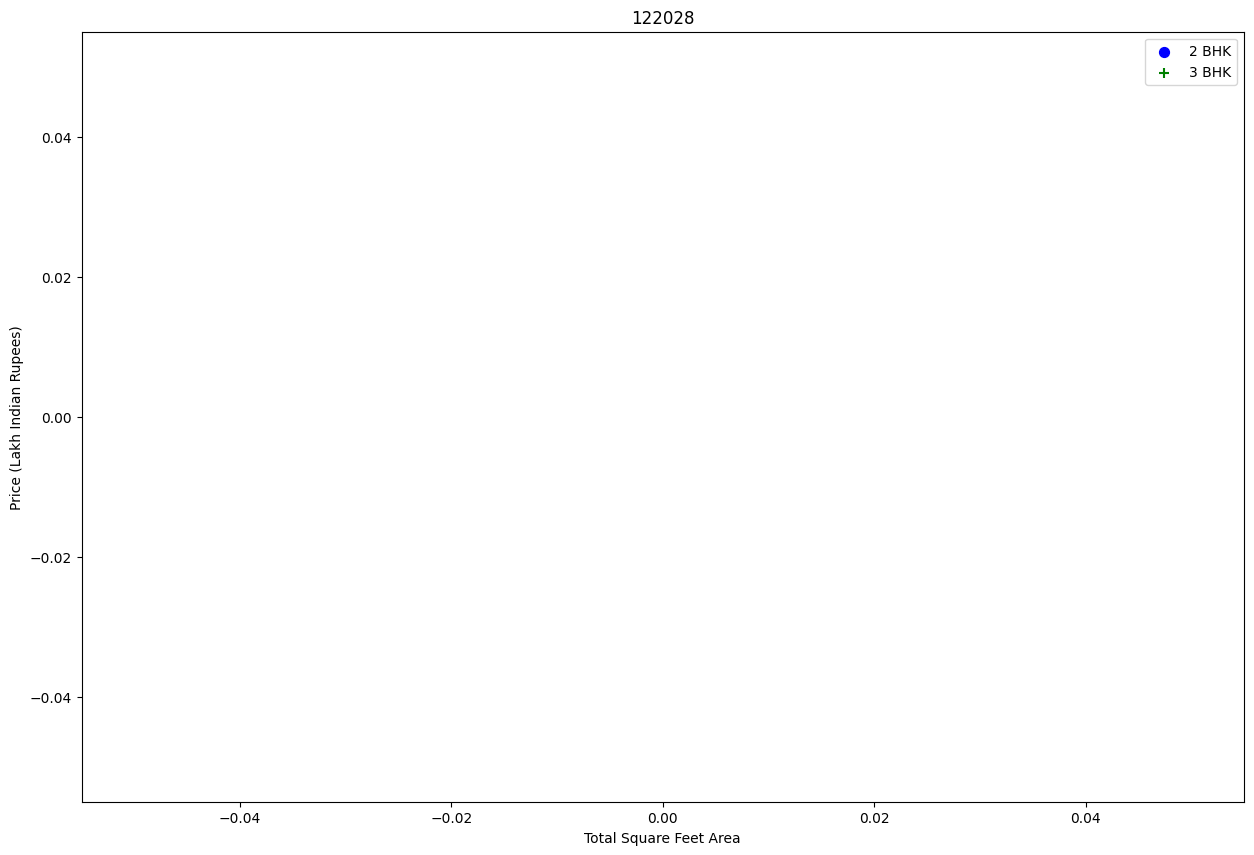

In [38]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df['Postal Code']==location) & (df['number of bedrooms']==2)]
    bhk3 = df[(df['Postal Code']==location) & (df['number of bedrooms']==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2['living area'],bhk2.Price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3['living area'],bhk3.Price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df7,122028)

In [39]:
df7.shape

(10572, 11)

In [40]:
def remove_bhk_bath_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('Postal Code'):
        bhk_bath_stats = {}
        for bhk, bhk_df in location_df.groupby('number of bedrooms'):
            for bath, bath_df in bhk_df.groupby('number of bathrooms'):
                bhk_bath_stats[(bhk, bath)] = {
                    'mean': np.mean(bath_df['price per sq feet']),
                    'std': np.std(bath_df['price per sq feet']),
                    'count': bath_df.shape[0]
                }
        for (bhk, bath), stats in bhk_bath_stats.items():
            if stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, location_df[
                    (location_df['number of bedrooms'] == bhk) & 
                    (location_df['number of bathrooms'] == bath) & 
                    (location_df['price per sq feet'] < stats['mean'])
                ].index.values)
    return df.drop(exclude_indices, axis='index')

df8 = remove_bhk_bath_outliers(df7)
df8.shape


(5641, 11)

In [41]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('Postal Code'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('number of bedrooms'):
            bhk_stats[bhk] = {
                'mean_bhk': np.mean(bhk_df['price per sq feet']),
                'std_bhk': np.std(bhk_df['price per sq feet']),
                'count_bhk': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('number of bedrooms'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count_bhk']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df['price per sq feet']<(stats['mean_bhk'])].index.values)
    return df.drop(exclude_indices,axis='index')


df9 = remove_bhk_outliers(df7)
df9.shape

(5406, 11)

In [42]:
def remove_bhk_bath_outlier(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('Postal Code'):
        bhk_stats = {}
        bath_stats = {}
        for bhk, bhk_df in location_df.groupby('number of bedrooms'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df['price per sq feet']),
                'std': np.std(bhk_df['price per sq feet']),
                'count': bhk_df.shape[0]
            }
        for bath, bath_df in location_df.groupby('number of bathrooms'):
            bath_stats[bath] = {
                'mean': np.mean(bath_df['price per sq feet']),
                'std': np.std(bath_df['price per sq feet']),
                'count': bath_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('number of bedrooms'):
            for bath, bath_df in location_df.groupby('number of bathrooms'):
                bhk_mean = bhk_stats.get(bhk, {'mean': 0})['mean']
                bath_mean = bath_stats.get(bath, {'mean': 0})['mean']
                if bhk < bhk_mean and bath < bath_mean:
                    exclude_indices = np.append(exclude_indices, bhk_df[
                        (bhk_df['price per sq feet'] < bhk_mean) & (bath_df['price per sq feet'] < bath_mean)
                    ].index.values)
    return df.drop(exclude_indices, axis='index')

df10 = remove_bhk_bath_outlier(df7)
df10.shape

C:\Users\Admin\AppData\Local\Temp\ipykernel_32544\376905483.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  exclude_indices = np.append(exclude_indices, bhk_df[
C:\Users\Admin\AppData\Local\Temp\ipykernel_32544\376905483.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  exclude_indices = np.append(exclude_indices, bhk_df[
C:\Users\Admin\AppData\Local\Temp\ipykernel_32544\376905483.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  exclude_indices = np.append(exclude_indices, bhk_df[
C:\Users\Admin\AppData\Local\Temp\ipykernel_32544\376905483.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  exclude_indices = np.append(exclude_indices, bhk_df[
C:\Users\Admin\AppData\Local\Temp\ipykernel_32544\376905483.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  exclude_indices = np.append(exclude_indices, bhk_df[
C:\Users\A

(5584, 11)

In [43]:
df10

id  number of bedrooms  number of bathrooms  living area  \
0      6762814461                   4                    2         2200   
2      6762810519                   5                    4         4270   
4      6762813540                   4                    2         2410   
5      6762824831                   3                    1         1010   
6      6762816464                   3                    2         1750   
...           ...                 ...                  ...          ...   
10566  6762815078                   3                    2         1770   
10568  6762816975                   1                    1         1310   
10569  6762812740                   4                    2         2180   
10570  6762810283                   5                    3         4110   
10571  6762821195                   4                    1         1100   

       lot area  number of floors  Postal Code  Distance from the airport  \
0         11250                 1       110001                         53   
2          8076                 2       110001                         72   
4          9549                 1       110001                         63   
5          9360                 1       110001                         67   
6          3354                 2       110001                         66   
...         ...               ...          ...                        ...   
10566      2150                 3       700007                         52   
10568      8667                 1       700007                         74   
10569      9800                 2       700007                         64   
10570      7920                 2       700007                         51   
10571      3300                 1       700007                         50   

         Price  price per sq feet  area/bedroom  
0       698000         317.272727        1100.0  
2      1530000         358.313817        1067.5  
4       758000         314.522822        1205.0  
5       350000         346.534653        1010.0  
6       595000         340.000000         875.0  
...        ...                ...           ...  
10566   660000         372.881356         885.0  
10568   575000         438.931298        1310.0  
10569   825000         378.440367        1090.0  
10570  1880000         457.420925        1370.0  
10571   441000         400.909091        1100.0  

[5584 rows x 11 columns]

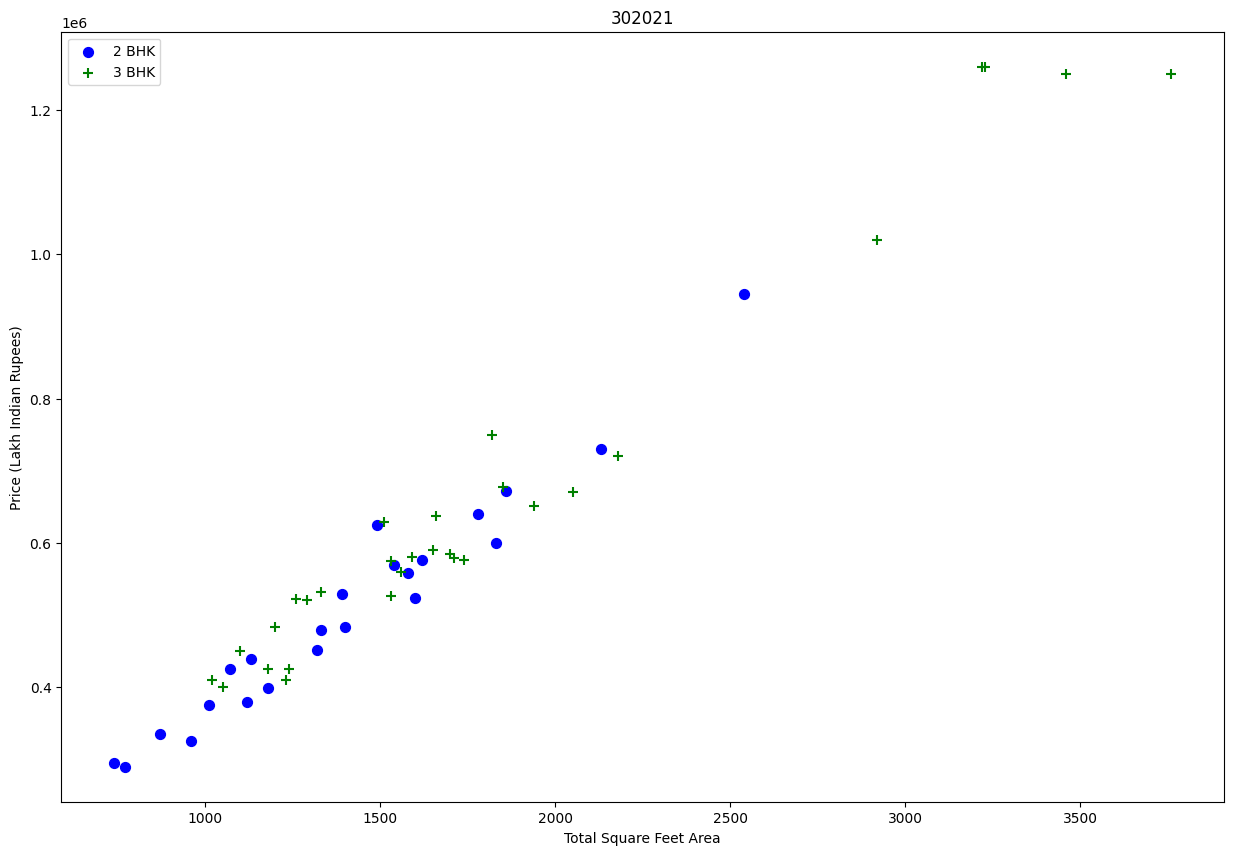

In [44]:
plot_scatter_chart(df10,302021)

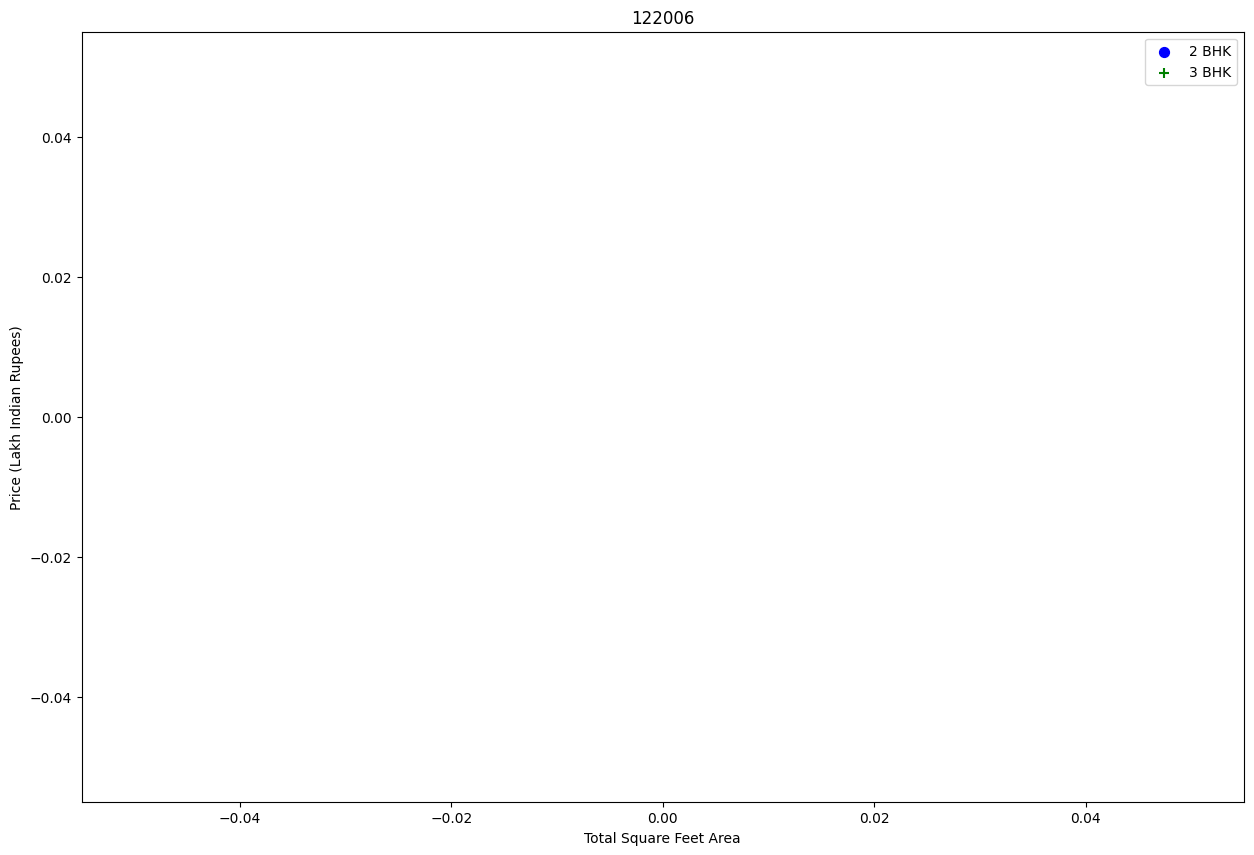

In [45]:
plot_scatter_chart(df9,122006)

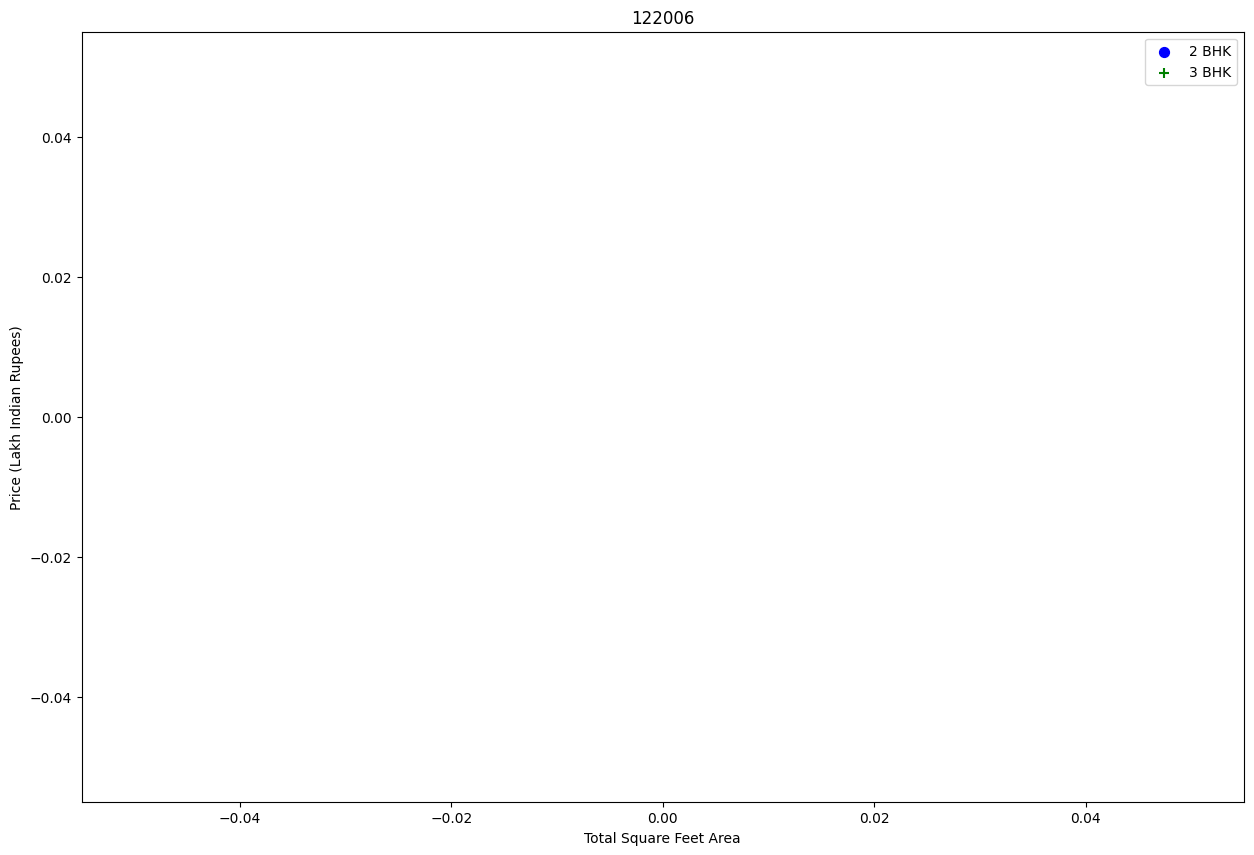

In [46]:
plot_scatter_chart(df8,122006)

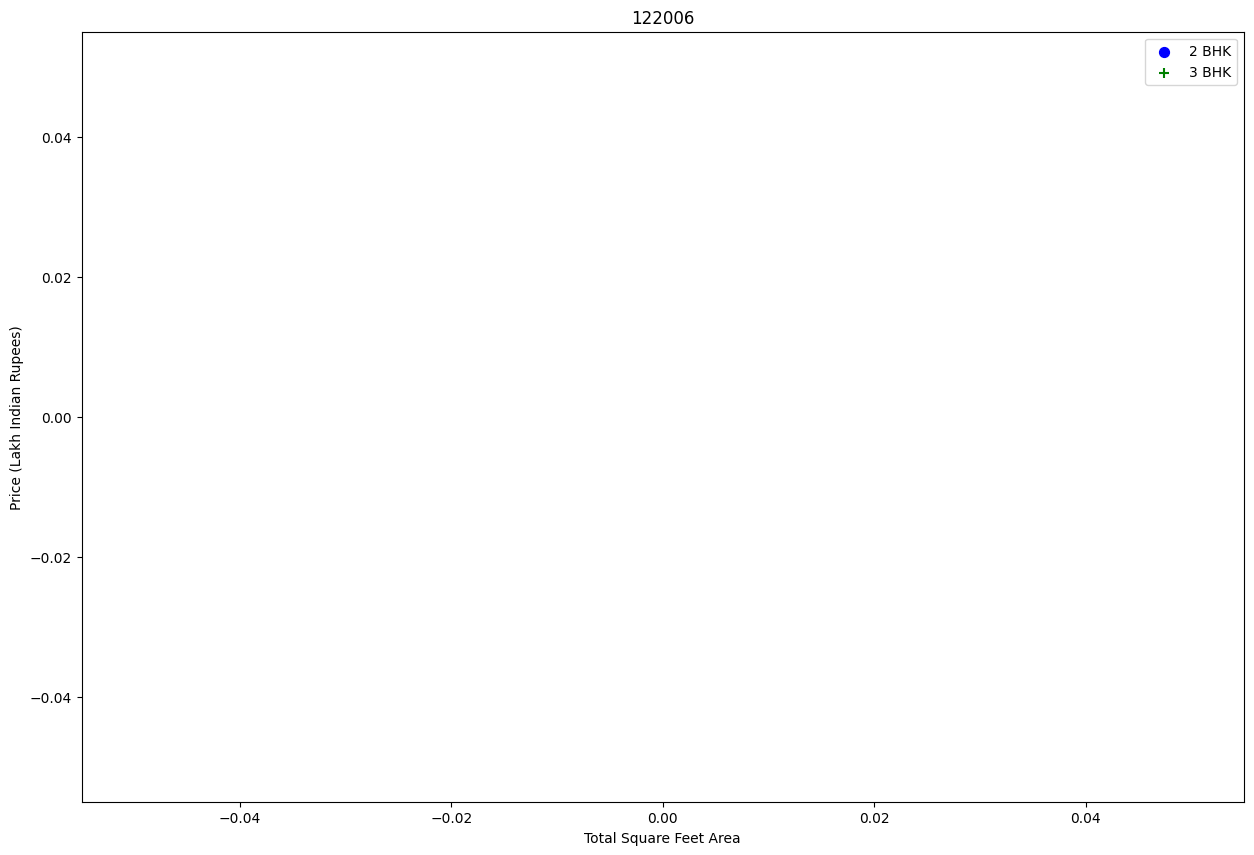

In [47]:
plot_scatter_chart(df7,122006)

Text(0, 0.5, 'Count')

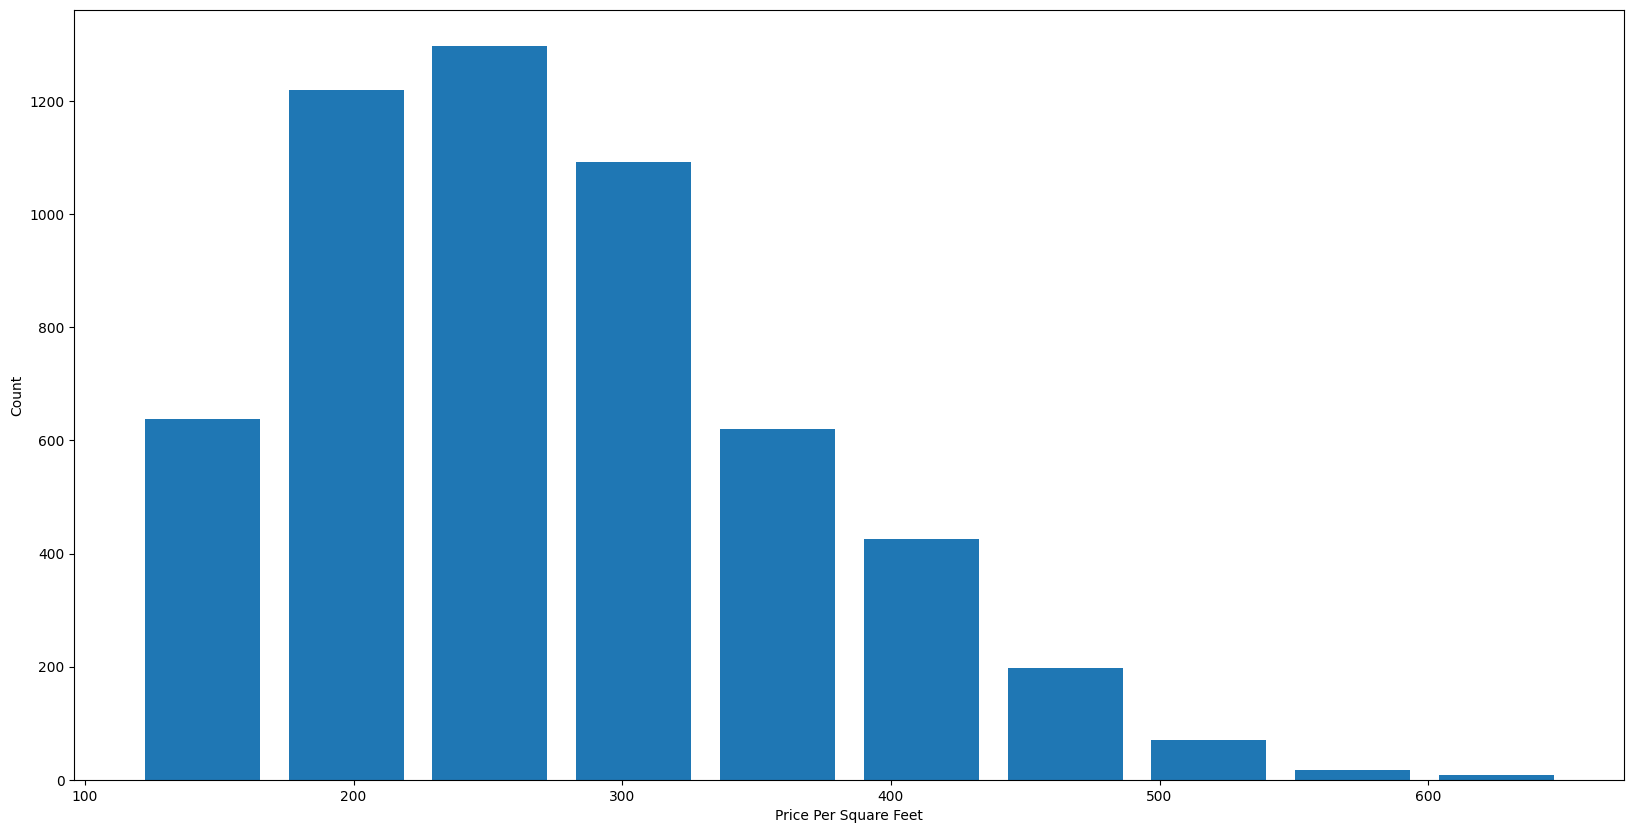

In [48]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df10['price per sq feet'],rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

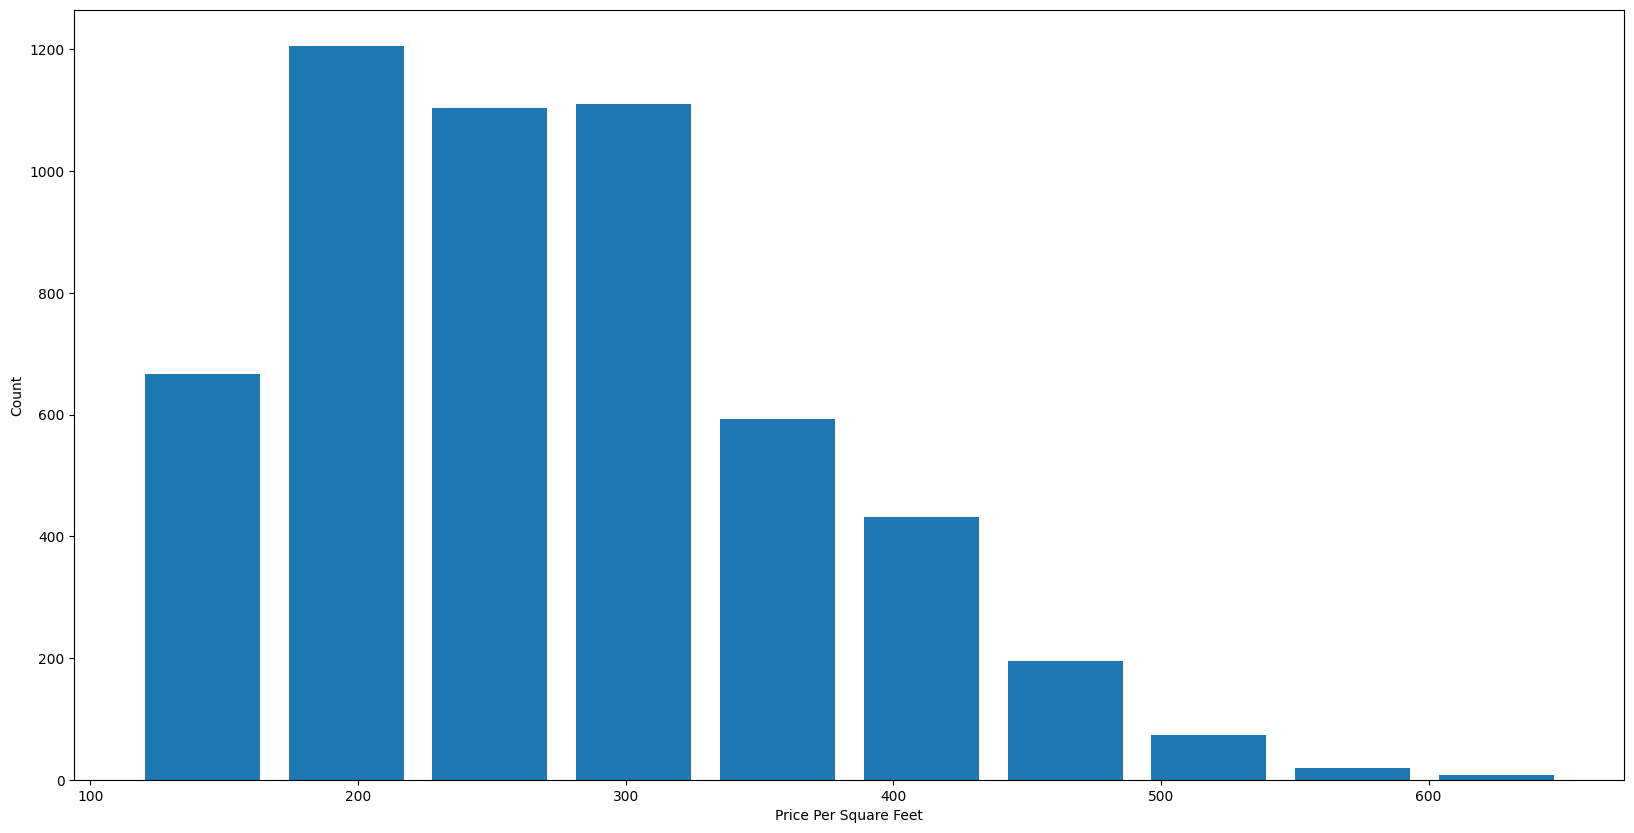

In [49]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df9['price per sq feet'],rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

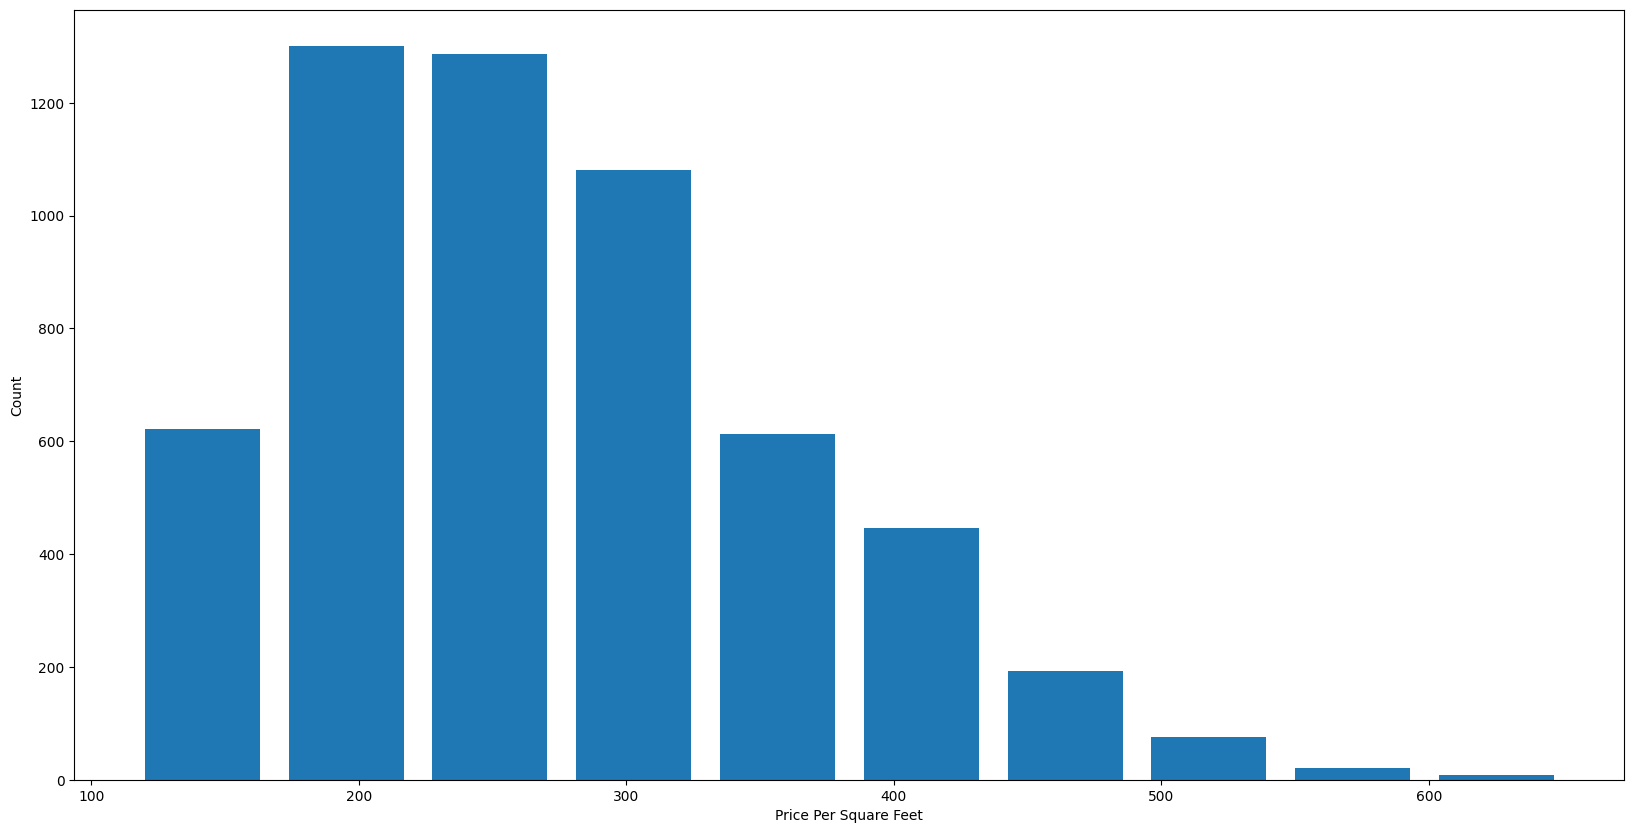

In [50]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8['price per sq feet'],rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

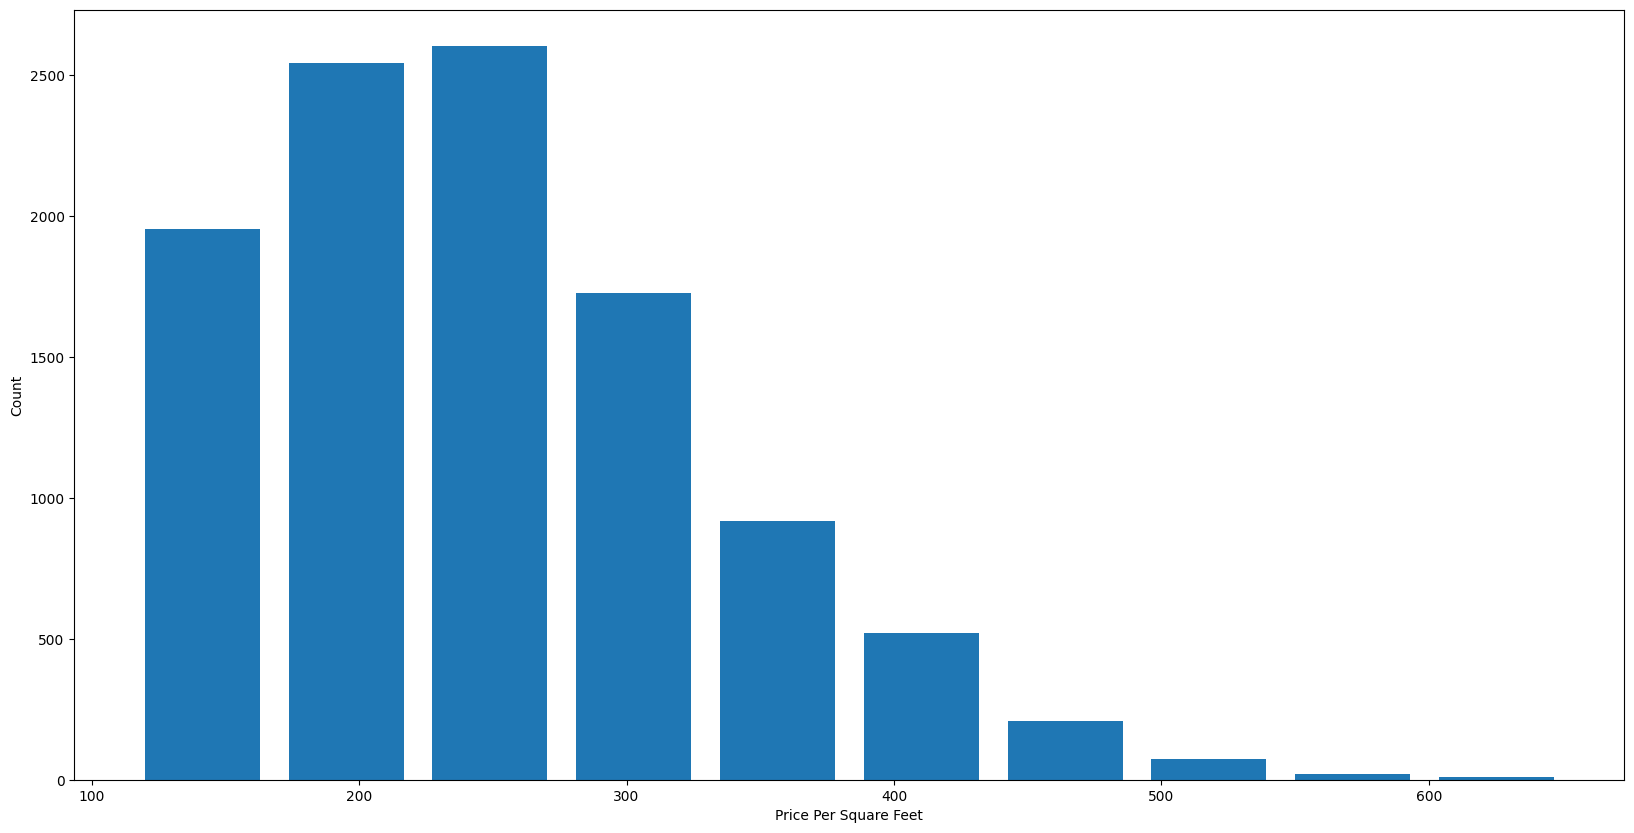

In [51]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7['price per sq feet'],rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [52]:
df11 = df10[df10['number of bathrooms']<=df10['number of bedrooms']+1]
df11.shape

(5584, 11)

In [53]:
df11

id  number of bedrooms  number of bathrooms  living area  \
0      6762814461                   4                    2         2200   
2      6762810519                   5                    4         4270   
4      6762813540                   4                    2         2410   
5      6762824831                   3                    1         1010   
6      6762816464                   3                    2         1750   
...           ...                 ...                  ...          ...   
10566  6762815078                   3                    2         1770   
10568  6762816975                   1                    1         1310   
10569  6762812740                   4                    2         2180   
10570  6762810283                   5                    3         4110   
10571  6762821195                   4                    1         1100   

       lot area  number of floors  Postal Code  Distance from the airport  \
0         11250                 1       110001                         53   
2          8076                 2       110001                         72   
4          9549                 1       110001                         63   
5          9360                 1       110001                         67   
6          3354                 2       110001                         66   
...         ...               ...          ...                        ...   
10566      2150                 3       700007                         52   
10568      8667                 1       700007                         74   
10569      9800                 2       700007                         64   
10570      7920                 2       700007                         51   
10571      3300                 1       700007                         50   

         Price  price per sq feet  area/bedroom  
0       698000         317.272727        1100.0  
2      1530000         358.313817        1067.5  
4       758000         314.522822        1205.0  
5       350000         346.534653        1010.0  
6       595000         340.000000         875.0  
...        ...                ...           ...  
10566   660000         372.881356         885.0  
10568   575000         438.931298        1310.0  
10569   825000         378.440367        1090.0  
10570  1880000         457.420925        1370.0  
10571   441000         400.909091        1100.0  

[5584 rows x 11 columns]

In [54]:
pd.set_option('display.max_rows', None)

In [55]:
#pandas dummy method to encode text data to numerical categorical
# not used here
#dummy= pd.get_dummies(example_data_frame.attribute)
#df_new=example_data_frame.drop('attribute',axis='coloumns')

In [56]:
df10.shape
df10.columns

Index(['id', 'number of bedrooms', 'number of bathrooms', 'living area',
       'lot area', 'number of floors', 'Postal Code',
       'Distance from the airport', 'Price', 'price per sq feet',
       'area/bedroom'],
      dtype='object')

In [57]:
x=df11.drop(['id','Price','price per sq feet','area/bedroom'],axis='columns')
x

number of bedrooms  number of bathrooms  living area  lot area  \
0                       4                    2         2200     11250   
2                       5                    4         4270      8076   
4                       4                    2         2410      9549   
5                       3                    1         1010      9360   
6                       3                    2         1750      3354   
7                       4                    3         3280     11000   
9                       1                    1          810      3211   
10                      4                    2         2260     41984   
12                      3                    2         4460     26027   
18                      3                    2         2890     12130   
21                      5                    4         4590     14685   
24                      3                    2         1550     12920   
27                      4                    2         2700      9320   
28                      3                    2         2430      5500   
30                      3                    2         1480     14250   
32                      3                    1         1480      7040   
33                      4                    1         1320     14250   
34                      5                    3         3630      6000   
36                      4                    2         2580      3909   
38                      4                    3         4030     10800   
42                      3                    2         2670     10481   
44                      4                    2         3870     10046   
49                      3                    2         1850      7777   
51                      5                    3         3370      7947   
53                      3                    1         2080     75794   
55                      4                    2         3330      9143   
57                      4                    2         3340     10422   
60                      3                    2         1550      5511   
61                      5                    2         3580      8921   
62                      4                    2         3160      8281   
65                      4                    2         3130     10849   
68                      3                    1         1710      8767   
73                      3                    2         3430     28718   
75                      2                    1         1650      7500   
76                      3                    2         1270     10227   
81                      3                    1         1070     10125   
82                      3                    2         2190     11060   
83                      3                    2         1840     14985   
85                      3                    2         2190      7982   
86                      4                    2         2580      3943   
89                      3                    1         1110      5500   
90                      3                    1          940      8512   
91                      4                    2         2070      8473   
92                      5                    4         4590     35046   
94                      3                    1         1630     15600   
95                      3                    3         4070     26000   
97                      4                    1         2600     41041   
98                      4                    2         3820      8850   
99                      4                    2         2090      8064   
100                     5                    3         4270      7500   
101                     4                    1         2190      9400   
102                     3                    1         1570      8530   
105                     4                    2         2910      9131   
106                     4                    1         1810      

In [58]:
df11_sorted = df11.sort_values(by='Price', ascending=False)
df11_sorted

id  number of bedrooms  number of bathrooms  living area  \
9481   6762810023                   5                    5         9200   
4739   6762810033                   5                    5         7050   
9488   6762810042                   5                    5         5450   
4670   6762810049                   8                    4         7710   
1282   6762810052                   7                    4         6210   
6731   6762810055                   6                    5         7100   
3881   6762810059                   6                    4         6980   
3971   6762810074                   5                    4         6240   
9486   6762810072                   4                    3         4860   
9492   6762810079                   5                    4         5190   
4693   6762810084                   4                    4         5780   
4658   6762810083                   7                    3         5350   
4938   6762810082                   5                    6         8670   
9474   6762810088                   4                    3         4430   
9477   6762810098                   5                    3         4290   
1893   6762810101                   6                    4         5540   
4825   6762810105                   4                    4         5540   
1907   6762810108                   4                    2         5300   
4684   6762810111                   5                    4         5410   
5980   6762810114                   4                    5         6930   
9489   6762810117                   4                    4         4300   
4702   6762810128                   5                    4         4430   
9487   6762810131                   7                    4         4670   
4597   6762810130                   4                    3         4730   
4714   6762810136                   4                    3         4140   
1839   6762810138                   6                    4         5480   
197    6762810144                   4                    4         6330   
3923   6762810148                   4                    4         5010   
3932   6762810153                   5                    4         5780   
4769   6762810158                   7                    4         5310   
4734   6762810155                   4                    3         4250   
4741   6762810163                   4                    2         4080   
4625   6762810168                   3                    4         5150   
4683   6762810171                   4                    2         4760   
4604   6762810167                   5                    4         4860   
9485   6762810185                   3                    2         3570   
4826   6762810195                   4                    3         4750   
1929   6762810194                   6                    2         4710   
578    6762810198                   3                    3         4660   
4794   6762810199                   8                    6         4340   
4773   6762810202                   4                    3         3860   
9473   6762810208                   4                    1         3550   
3506   6762810209                   5                    3         5340   
4733   6762810210                   4                    3         4230   
4736   6762810211                   4                    3         4350   
3879   6762810220                   4                    3         4260   
4615   6762810229                   5                    3         4480   
4764   6762810232                   4                    4         4360   
4716   6762810235                   4                    3         4370   
4596   6762810234                   8                    3         4440   
3906   6762810241                   7                    3         4640   
4792   6762810253                   4                    3         4280   
3541   6762810252                   5   

In [59]:
y= df11.Price
y.head(3)

0     698000
2    1530000
4     758000
Name: Price, dtype: int64

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=45)

In [99]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.6625733882151137

In [100]:
lr_clf.intercept_
lr_clf.coef_

array([-1.73469109e+04, -7.53141545e+03,  3.61562000e+02, -1.11544608e+00,
       -5.63560549e+04, -2.41300472e-01,  5.74857067e+01])

In [101]:
pre= lr_clf.predict(x_train)
pre

array([301595.95903945, 479460.65350174, 242699.17470165, ...,
       499461.34811312, 597317.77170717, 182452.43591253])

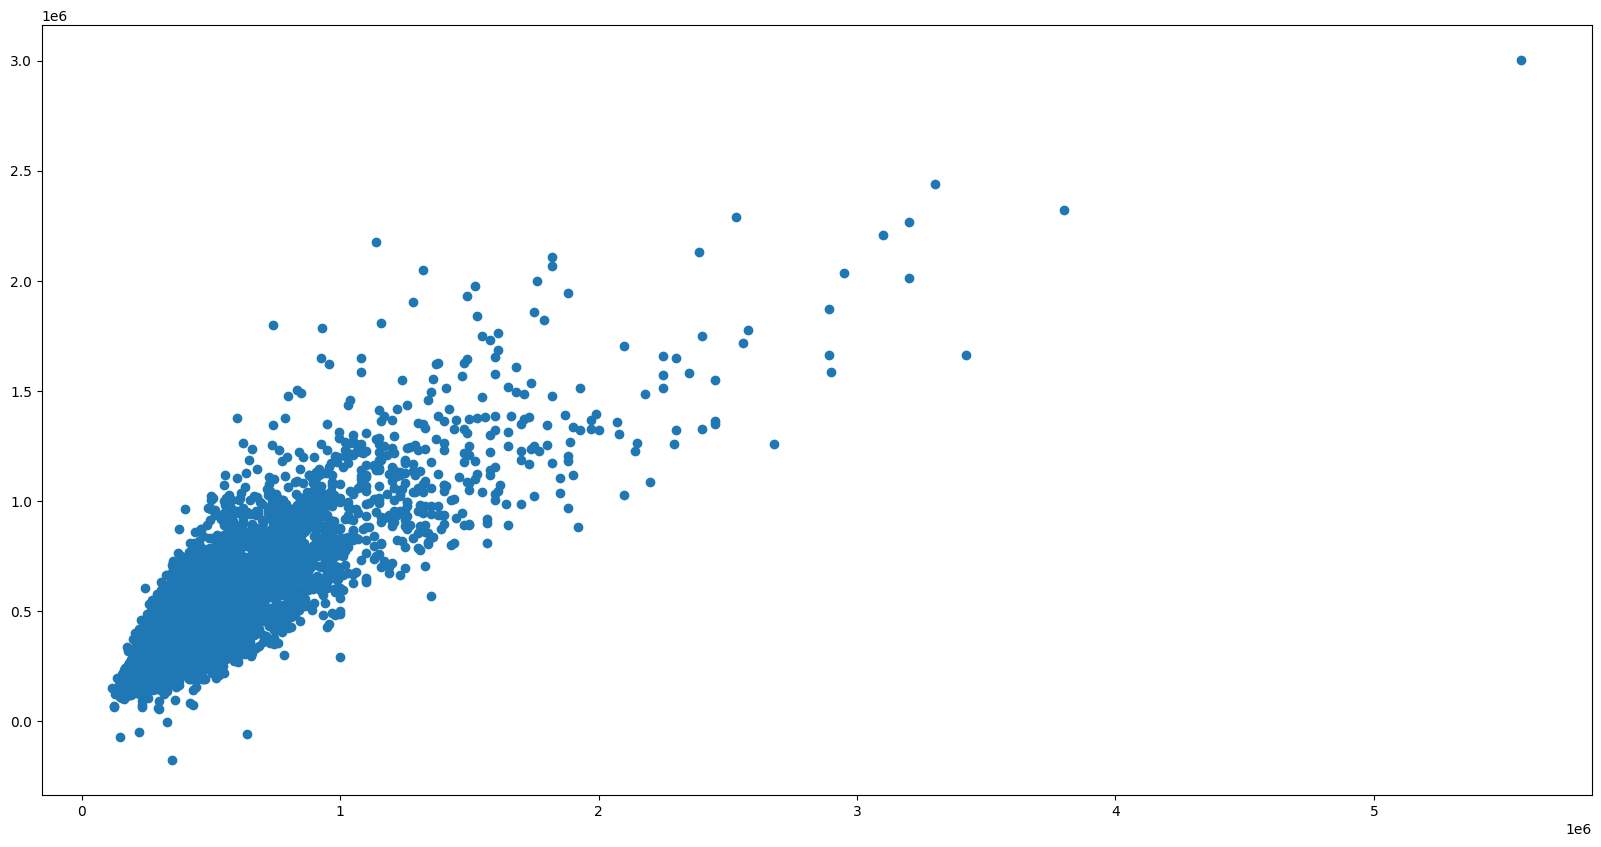

In [64]:
import matplotlib.pyplot as plt 
plt.scatter(y_train,pre)
plt.show()

In [102]:
from sklearn.metrics import r2_score
r2_score(y_train,pre)

0.6846369898322502

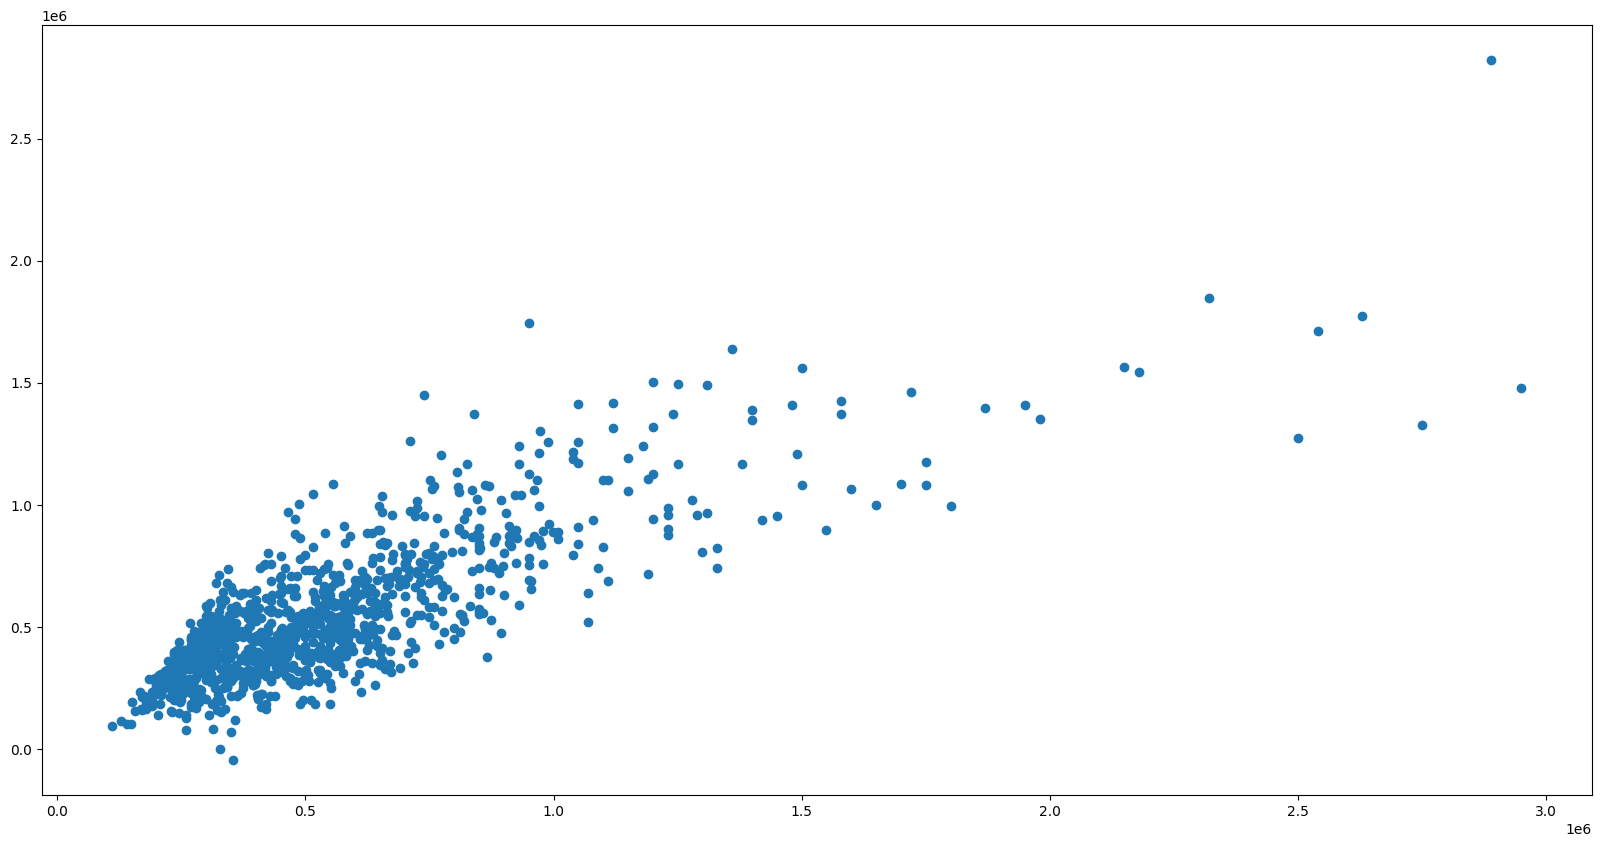

0.6625733882151137

In [103]:
post = lr_clf.predict(x_test)
plt.scatter(y_test,post)
plt.show()
r2_score(y_test,post)

In [104]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=8, test_size=0.18, random_state=5)
cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.68029278, 0.67016512, 0.59730022, 0.67397268, 0.674976  ,
       0.69616683, 0.67553279, 0.65458134])

In [68]:
# from sklearn.model_selection import ShuffleSplit, cross_val_score
# from sklearn.ensemble import RandomForestClassifier

# cv = ShuffleSplit(n_splits=8, test_size=0.18, random_state=5)

# scores = cross_val_score(RandomForestClassifier(n_estimators=4), x, y, cv=list(cv.split(x)))

# print("Cross-validation scores:", scores)

In [69]:
# from sklearn.model_selection import ShuffleSplit
# from sklearn.model_selection import cross_val_score

# cross_val_score(LinearRegression(), x, y, cv=8)

In [70]:
# from sklearn.model_selection import ShuffleSplit, cross_val_score
# from sklearn.svm import SVC

# cv = ShuffleSplit(n_splits=8, test_size=0.18, random_state=5)

# cross_val_score(SVC(), x, y, cv=list(cv.split(x)))


In [71]:
# from sklearn.svm import SVC
# svm = SVC()
# svm.fit(x_train,y_train)
# svm.score(x_test,y_test)

In [72]:
# from sklearn.ensemble import RandomForestClassifier
# rf = RandomForestClassifier(n_estimators=4)
# rf.fit(x_train,y_train)
# rf.score(x_test,y_test)

In [73]:
# from sklearn.model_selection import KFold
# kf = KFold(n_splits= 3)
# kf

In [74]:
# using grid search method
# gf = GridsearchCV(model,{paramaters},cv,return_train_score=False) 
# gf.fit(x,y)

In [75]:
# import pandas as pd
# from sklearn.model_selection import GridSearchCV, ShuffleSplit
# from sklearn.linear_model import LinearRegression, Lasso
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.naive_bayes import GaussianNB
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn import svm



# def find_best_model_using_gridsearchcv(X, y):
#     algos = {
        
#         # 'naive_bayes_gaussian': {
#         #     'model': GaussianNB(),
#         #     'params': {}
#         # },
#         # 'naive_bayes_multinomial': {
#         #     'model': MultinomialNB(),
#         #     'params': {}
#         # },
#         'lasso': {
#             'model': Lasso(),
#             'params': {
#                 'alpha': [1, 2],
#                 'selection': ['random', 'cyclic']
#             }
#         }
#         # 'decision_tree': {
#         #     'model': DecisionTreeRegressor(),
#         #     'params': {
#         #         'criterion': ['squared_error', 'friedman_mse','gini','entropy'],
#         #         'splitter': ['best', 'random']
#         #     }
#         # }
#     }

#     scores = []
#     cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
#     for algo_name, config in algos.items():
#         gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
#         gs.fit(X, y)
#         scores.append({
#             'model': algo_name,
#             'best_score': gs.best_score_,
#             'best_params': gs.best_params_
#         })

#     return pd.DataFrame(scores)

# # Example usage:
# # Assuming `x` and `y` are your features and target variable datasets
# find_best_model_using_gridsearchcv(x, y)
# # print(result)211

In [76]:
# import pandas as pd
# from sklearn.model_selection import GridSearchCV, ShuffleSplit
# from sklearn.linear_model import LinearRegression, Lasso
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import RandomizedSearchCV
# from sklearn.naive_bayes import GaussianNB
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn import svm



# def find_best_model_using_gridsearchcv(X, y):
#     algos = {
#         'linear_regression': {
#             'model': Pipeline([
#                 ('scaler', StandardScaler()),
#                 ('regressor', LinearRegression())
#             ]),
#             'params': {
#                 'regressor__fit_intercept': [True, False]
#             }
#         },
#         'logistic_regression' : {
#             'model': LogisticRegression(solver='liblinear',multi_class='auto'),
#             'params': {
#                 'C': [1,5,10]
#             }
#         }
#     }

#     scores = []
#     cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
#     for algo_name, config in algos.items():
#         gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
#         gs.fit(X, y)
#         scores.append({
#             'model': algo_name,
#             'best_score': gs.best_score_,
#             'best_params': gs.best_params_
#         })

#     return pd.DataFrame(scores)

# # Example usage:
# # Assuming `x` and `y` are your features and target variable datasets
# find_best_model_using_gridsearchcv(x, y)
# # print(result)211

In [77]:
# we cann observe Decision Tree gives the best model 
# so now we proceed with exporting the model  
# number of bedrooms	number of bathrooms	living area	lot area	number of floors	Postal Code	Distance from the airport

In [105]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(x_train, y_train)
dt_regressor.score(x_test, y_test)


0.7441975548563842

In [106]:
x_test.dtypes

number of bedrooms           int64
number of bathrooms          int64
living area                  int64
lot area                     int64
number of floors             int64
Postal Code                  int64
Distance from the airport    int64
dtype: object

In [80]:
# def predict_price(num_bedrooms, num_bathrooms, living_area, lot_area, num_floors, postal_code, distance_from_airport):
#     # Find the index of the Postal Code column in X
#     loc_index = np.where(x.columns == 'Postal Code')[0][0]
#     # Create a zero vector with the same length as the number of columns in X
#     feature_vector = np.zeros(len(x.columns))
#     # Assign input variables to the correct indices
#     feature_vector[0] = num_bedrooms
#     feature_vector[1] = num_bathrooms
#     feature_vector[2] = living_area
#     feature_vector[3] = lot_area
#     feature_vector[4] = num_floors
#     feature_vector[5] = distance_from_airport
#     # Set the postal code feature in the vector
#     if loc_index >= 0:
#         feature_vector[loc_index] = postal_code
#     # Use the trained decision tree regressor to predict the price
#     return lr_clf.predict([feature_vector])[0]

In [114]:
def predict_price(num_bedrooms, num_bathrooms, living_area, lot_area, num_floors, postal_code, distance_from_airport):
    # Find the index of the Postal Code column in X
    # loc_index = np.where(x.columns == 'Postal Code')[0][0]
    # Create a zero vector with the same length as the number of columns in X
    feature_vector = np.zeros(len(x.columns))
    # Assign input variables to the correct indices
    feature_vector[0] = num_bedrooms
    feature_vector[1] = num_bathrooms
    feature_vector[2] = living_area
    feature_vector[3] = lot_area
    feature_vector[4] = num_floors
    feature_vector[6] = distance_from_airport
    feature_vector[5] = postal_code
    # Set the postal code feature in the vector
    # if loc_index >= 0:
    #     feature_vector[loc_index] = postal_code
    # Use the trained decision tree regressor to predict the price
    return lr_clf.predict([feature_vector])[0]

In [115]:
predict_price(1,3,1500,3000,2,560005,50)

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


348950.75226185424

In [116]:
predict_price(2,3,1500,3000,2,122067,50)

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


437278.4876482545

In [117]:
predict_price(3,3,1500,3000,2,302021,50)

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


376508.59148214175

In [118]:
predict_price(2,1,1500,3000,2,122067,50)

C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


452341.31853986945

In [86]:
# x['Postal Code'].unique()

In [112]:
# def predict_price_dt(num_bedrooms, num_bathrooms, living_area, lot_area, num_floors, postal_code, distance_from_airport):
#     # Find the index of the Postal Code column in X
#     # loc_index = np.where(x.columns == 'Postal Code')[0][0]
#     # Create a zero vector with the same length as the number of columns in X
#     feature_vector = np.zeros(len(x.columns))
#     # Assign input variables to the correct indices
#     feature_vector[0] = num_bedrooms
#     feature_vector[1] = num_bathrooms
#     feature_vector[2] = living_area
#     feature_vector[3] = lot_area
#     feature_vector[4] = num_floors
#     feature_vector[6] = distance_from_airport
#     feature_vector[5] = postal_code
#     # Set the postal code feature in the vector
#     # if loc_index >= 0:
#     #     feature_vector[loc_index] = postal_code
#     # Use the trained decision tree regressor to predict the price
#     return dt_regressor.predict([feature_vector])[0]

In [119]:
# predict_price_dt(1,3,1500,3000,2,122020,50)

In [120]:
# predict_price_dt(1,3,1500,3000,2,122067,50)

In [90]:
#typical decision tree behaviour
#observation this will not give flexible results rather will show tendency of classifiying the results 

In [121]:
import pickle
with open('house_price_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [122]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [93]:
# x['Postal Code'].unique()

In [124]:
import json
postal_codes = [int(code) for code in x['Postal Code'].unique()]

# Create a dictionary with data columns
postal = {
    'data_columns': postal_codes
}

# Write the dictionary to a JSON file
with open("postal.json", "w") as f:
    json.dump(postal, f)

In [125]:
x['Postal Code'].unique()

array([110001, 110002, 110003, 110004, 110005, 110006, 110007, 226001,
       226002, 226003, 226004, 226005, 226006, 226007, 302001, 302002,
       302003, 302004, 302005, 302006, 302021, 380001, 380002, 380003,
       380004, 380005, 380007, 380008, 400001, 400002, 400003, 400004,
       400005, 400006, 400007, 411001, 411002, 411003, 411004, 411005,
       411006, 411007, 500001, 500002, 500003, 500004, 500005, 500006,
       500007, 560001, 560002, 560003, 560004, 560005, 560006, 560007,
       600001, 600002, 600003, 600004, 600005, 600006, 600007, 700001,
       700002, 700003, 700004, 700005, 700006, 700007], dtype=int64)